In [142]:
# Neccesary Libraries
import sys 
import copy
import numpy as np 
import math
import pandas as pd
import sys

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
from bokeh.plotting import figure, show
import altair as alt
import holoviews as hv
import folium
import statsmodels.api as sm 
import scipy.stats as stats

# Machine Learning Libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.inspection import permutation_importance
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import my_module
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [143]:
print(sys.path)

['/Users/cenghao/BADM 550 CAT', '/Users/cenghao/anaconda3/lib/python311.zip', '/Users/cenghao/anaconda3/lib/python3.11', '/Users/cenghao/anaconda3/lib/python3.11/lib-dynload', '', '/Users/cenghao/anaconda3/lib/python3.11/site-packages', '/Users/cenghao/anaconda3/lib/python3.11/site-packages/aeosa']


In [144]:
os.chdir('/Users/cenghao/Desktop/BADM 550 CAT/Data')
os.getcwd()

'/Users/cenghao/Desktop/BADM 550 CAT/Data'

In [145]:
# 1.Read Freight rate data
freight_rate_df = pd.read_excel('Freight_Rate.xlsx')

# Display the first few rows
freight_rate_df.head()

,Carrier,orig_port_cd,dest_port_cd,minm_wgh_qty,max_wgh_qty,svc_cd,minimum_cost,rate,mode_dsc,tpt_day_cnt,Carrier_type
0,V444_6,PORT08,PORT09,250.0,499.99,DTD,43.2272,0.7132,AIR,2,V88888888_0
1,V444_6,PORT08,PORT09,65.0,69.99,DTD,43.2272,0.7512,AIR,2,V88888888_0
2,V444_6,PORT08,PORT09,60.0,64.99,DTD,43.2272,0.7892,AIR,2,V88888888_0
3,V444_6,PORT08,PORT09,50.0,54.99,DTD,43.2272,0.8272,AIR,2,V88888888_0
4,V444_6,PORT08,PORT09,35.0,39.99,DTD,43.2272,1.0552,AIR,2,V88888888_0


In [146]:
# 2.Read Order list data
order_list_df = pd.read_excel('Order_List.xlsx')

# Display the first few rows
order_list_df.head()

,Order_ID,Order_Date,Origin_Port,Carrier,TPT,Service_Level,Ship_ahead_day_count,Ship_Late_Day_count,Customer,Product_ID,Plant_Code,Destination_Port,Unit_quantity,Weight
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34


In [147]:
# 3.Read Plan_ports data
plan_ports_df = pd.read_excel('Plant_Ports.xlsx')

# Display the first few rows
plan_ports_df.head()

,Plant_Code,Port
0,PLANT01,PORT01
1,PLANT01,PORT02
2,PLANT02,PORT03
3,PLANT03,PORT04
4,PLANT04,PORT05


In [148]:
# 4.Read Products per plant data
prod_per_plant_df = pd.read_excel('ProductsPerPlant.xlsx')

# Display the first few rows
prod_per_plant_df.head()

,Plant_Code,Product_ID
0,PLANT15,1698815
1,PLANT17,1664419
2,PLANT17,1664426
3,PLANT17,1672826
4,PLANT17,1674916


In [149]:
# 5.Read VMI customer data
vmi_cus_df = pd.read_excel('VMI_Customers.xlsx')

# Display the first few rows
vmi_cus_df.head()

,Plant_Code,Customers
0,PLANT02,V5555555555555_16
1,PLANT02,V555555555555555_29
2,PLANT02,V555555555_3
3,PLANT02,V55555555555555_8
4,PLANT02,V55555555_9


In [150]:
# 6.Read Wh capacity data
wh_cap_df = pd.read_excel('Wh_Capcities.xlsx')

# Display the first few rows
wh_cap_df.head()

,Plant_ID,Daily_Capacity
0,PLANT15,11
1,PLANT17,8
2,PLANT18,111
3,PLANT05,385
4,PLANT02,138


In [151]:
# 7.Read Wh costs list data
wh_costs_df = pd.read_excel('Wh_Costs.xlsx')

# Display the first few rows
wh_costs_df .head()

,WH,Cost_per_unit
0,PLANT15,1.415063
1,PLANT17,0.428947
2,PLANT18,2.036254
3,PLANT05,0.488144
4,PLANT02,0.477504


In [152]:
# Data cleaning 
# Checking for missing values
missing_values_freight_rate = freight_rate_df.isnull().sum()
missing_values_order_list = order_list_df.isnull().sum()
missing_values_plan_ports = plan_ports_df.isnull().sum()
missing_values_prod_per_plant = prod_per_plant_df.isnull().sum()
missing_values_vmi_cus = vmi_cus_df.isnull().sum()
missing_values_wh_cap = wh_cap_df.isnull().sum()
missing_values_wh_costs = wh_costs_df.isnull().sum()
missing_values_freight_rate,missing_values_order_list,missing_values_plan_ports,missing_values_prod_per_plant,missing_values_vmi_cus,missing_values_wh_cap,missing_values_wh_costs
# Results show that 7 files have no missing values

(Carrier         0
 orig_port_cd    0
 dest_port_cd    0
 minm_wgh_qty    0
 max_wgh_qty     0
 svc_cd          0
 minimum_cost    0
 rate            0
 mode_dsc        0
 tpt_day_cnt     0
 Carrier_type    0
 dtype: int64,
 Order_ID                0
 Order_Date              0
 Origin_Port             0
 Carrier                 0
 TPT                     0
 Service_Level           0
 Ship_ahead_day_count    0
 Ship_Late_Day_count     0
 Customer                0
 Product_ID              0
 Plant_Code              0
 Destination_Port        0
 Unit_quantity           0
 Weight                  0
 dtype: int64,
 Plant_Code    0
 Port          0
 dtype: int64,
 Plant_Code    0
 Product_ID    0
 dtype: int64,
 Plant_Code    0
 Customers     0
 dtype: int64,
 Plant_ID           0
 Daily_Capacity     0
 dtype: int64,
 WH               0
 Cost_per_unit    0
 dtype: int64)

In [155]:
# Checking for Duplicates: order_list
order_list_df.duplicated(subset=['Order_ID'])
# It seems no duplicates in order_list

0       False
1       False
2       False
3       False
4       False
        ...  
9210    False
9211    False
9212    False
9213    False
9214    False
Length: 9215, dtype: bool

In [183]:
# 1.1 Data process: freight_rate
freight_rate_df.info()
freight_rate_df.describe()
freight_rate_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carrier       1540 non-null   object 
 1   orig_port_cd  1540 non-null   object 
 2   dest_port_cd  1540 non-null   object 
 3   minm_wgh_qty  1540 non-null   float64
 4   max_wgh_qty   1540 non-null   float64
 5   svc_cd        1540 non-null   object 
 6   minimum_cost  1540 non-null   float64
 7   rate          1540 non-null   float64
 8   mode_dsc      1540 non-null   object 
 9   tpt_day_cnt   1540 non-null   int64  
 10  Carrier_type  1540 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 132.5+ KB


(1540, 11)

In [184]:
# 2.1 Data process: order_list
order_list_df.info()
order_list_df.describe()
order_list_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9215 entries, 0 to 9214
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order_ID              9215 non-null   object        
 1   Order_Date            9215 non-null   datetime64[ns]
 2   Origin_Port           9215 non-null   object        
 3   Carrier               9215 non-null   object        
 4   TPT                   9215 non-null   int64         
 5   Service_Level         9215 non-null   object        
 6   Ship_ahead_day_count  9215 non-null   int64         
 7   Ship_Late_Day_count   9215 non-null   int64         
 8   Customer              9215 non-null   object        
 9   Product_ID            9215 non-null   object        
 10  Plant_Code            9215 non-null   object        
 11  Destination_Port      9215 non-null   object        
 12  Unit_quantity         9215 non-null   int64         
 13  Weight            

(9215, 14)

In [185]:
# Convert order ID to string
order_list_df['Order_ID'] = order_list_df['Order_ID'].astype(str)
order_list_df['Product_ID']= order_list_df['Product_ID'].astype(str)

In [186]:
# Q1: Predict the Rate of freight: based on freight_rate_df
# Business Question: Can we predict the Rate of freight based on the weight of the shipment, the origin-destination ports or other possible factors?
# Predictive Model: e.g. Linear Regression, Random Forest Regressor, Gradient Boosting

In [187]:
# Linear Regression
# Prepare the features and target variable
X_freight = freight_rate_df.drop(['rate'], axis=1)
y_freight = freight_rate_df['rate']

# Identify categorical columns (those of type 'object')
categorical_cols = X_freight.select_dtypes(include=['object']).columns

# Define numerical columns (we will pass these without transformation)
numerical_cols = X_freight.select_dtypes(include=['float64', 'int64']).columns

# Preprocessing for numerical data: No transformation needed in this case
# Preprocessing for categorical data: One-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Define the model
model = LinearRegression()

# Create a pipeline that first one-hot encodes the data then trains the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_freight, y_freight, test_size=0.2, random_state=0)

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying the evaluation metrics
(mse, r2)

(4.7345594632915935, 0.5180074486916779)

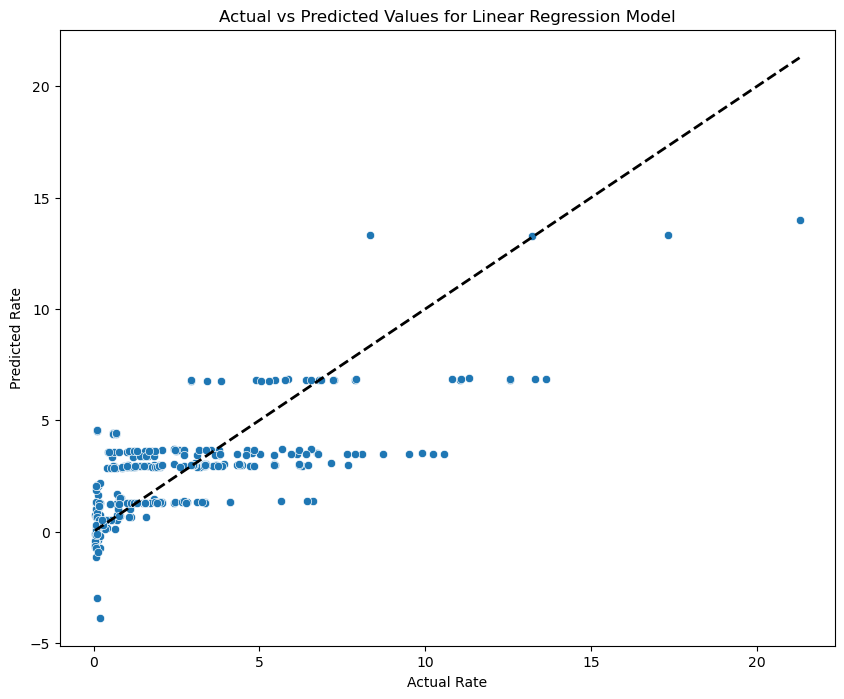

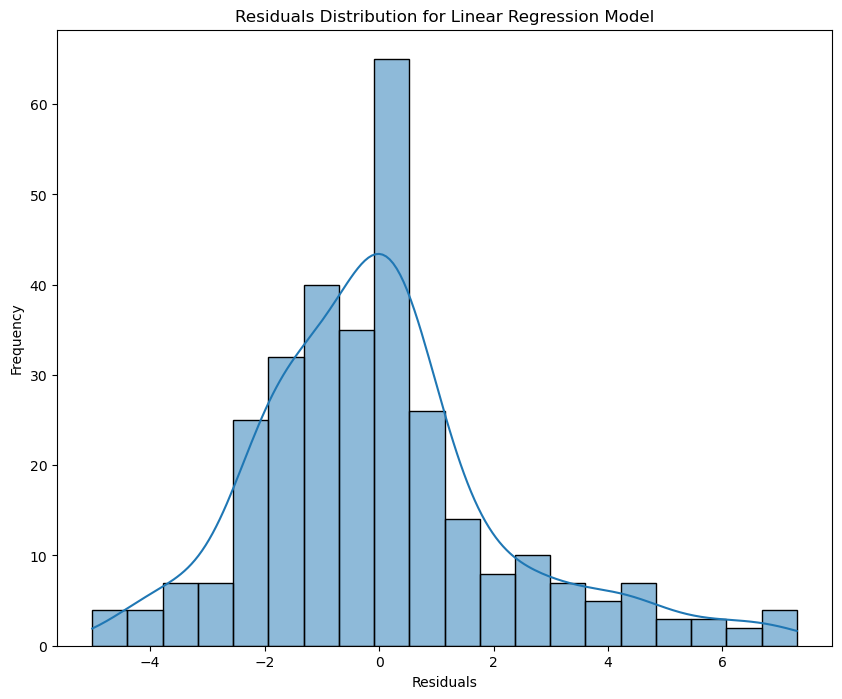

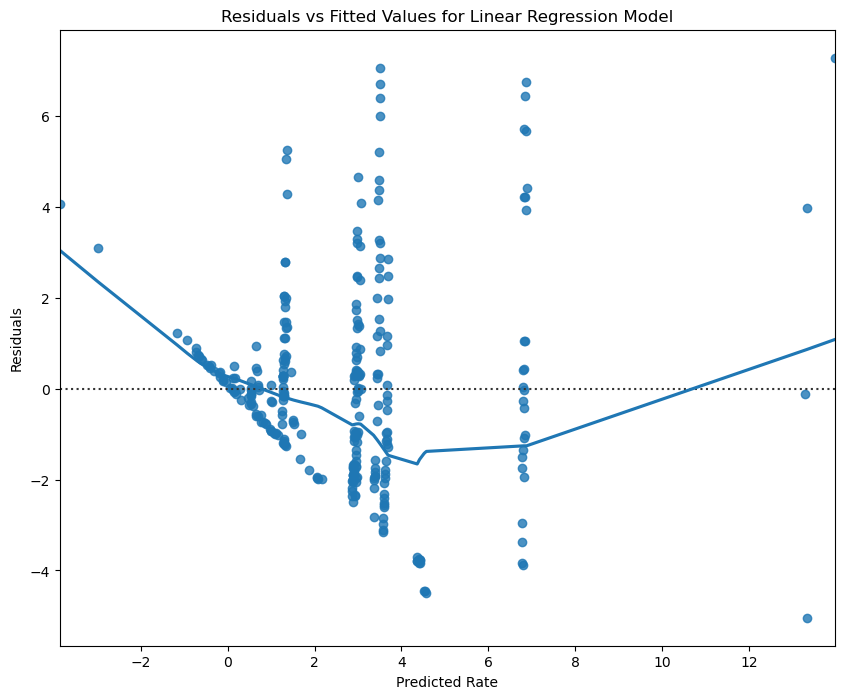

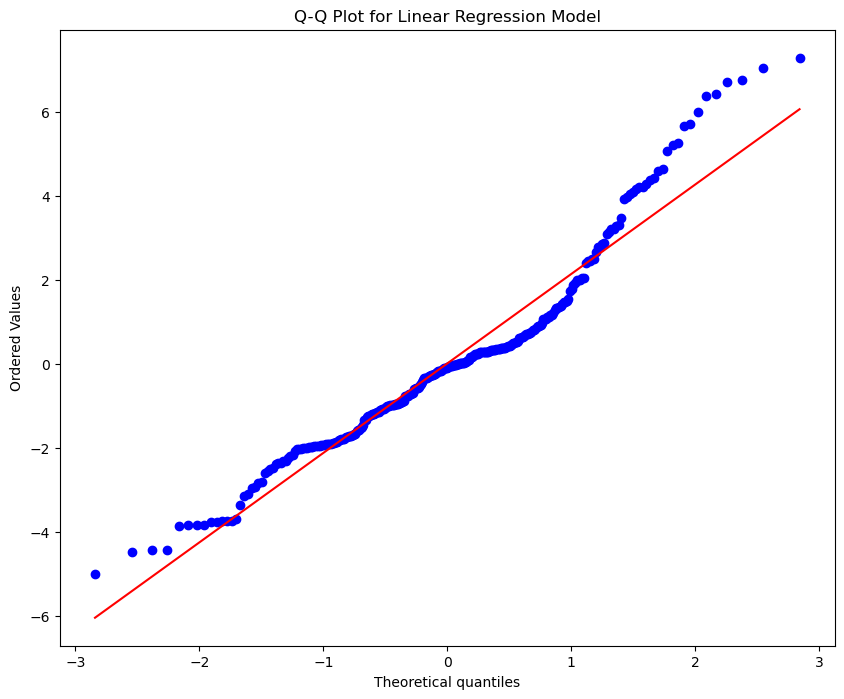

In [188]:
# Visualization: Linear Regression Model
# Get the predictions from the Linear Regression model
y_pred_lr = pipeline.predict(X_test)

# Actual vs Predicted Values
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Values for Linear Regression Model')
plt.xlabel('Actual Rate')
plt.ylabel('Predicted Rate')
plt.show()

# Residuals Distribution
residuals_lr = y_test - y_pred_lr
plt.figure(figsize=(10, 8))
sns.histplot(residuals_lr, kde=True)
plt.title('Residuals Distribution for Linear Regression Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Residuals vs Fitted Values
plt.figure(figsize=(10, 8))
sns.residplot(x=y_pred_lr, y=residuals_lr, lowess=True)
plt.title('Residuals vs Fitted Values for Linear Regression Model')
plt.xlabel('Predicted Rate')
plt.ylabel('Residuals')
plt.show()

# Q-Q Plot
plt.figure(figsize=(10, 8))
stats.probplot(residuals_lr, dist="norm", plot=plt)
plt.title('Q-Q Plot for Linear Regression Model')
plt.show()

In [189]:
# Problems in this linear regression: Possible Outliers or Leverage Points: There are points that lie significantly away from the cloud of other points, especially at the higher end of actual rates.  These may be outliers or leverage points that could be disproportionately influencing the model's predictions.
# Non-linearity: The data might have a non-linear relationship that a linear model cannot capture.  This could be why the model performs poorly, especially at the extremes of the data.
# Model Fit: The model may not be complex enough to capture the underlying pattern in the data.  This could be due to a lack of relevant features, the need for feature transformation, or interaction terms that are not accounted for in the current model.

In [163]:
# Q1: Predict the rate: based on freight_rate_df
# Random Forest(non-linear relationship)

In [190]:
# Define the Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=0)

# Create a new pipeline for the Random Forest Regressor
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', random_forest_model)])

# Train the Random Forest Regressor
rf_pipeline.fit(X_train, y_train)

# Predict and evaluate the Random Forest model
y_pred_rf = rf_pipeline.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Displaying the evaluation metrics for the Random Forest model
(mse_rf, r2_rf)

(1.380042248641395, 0.8595075023361317)

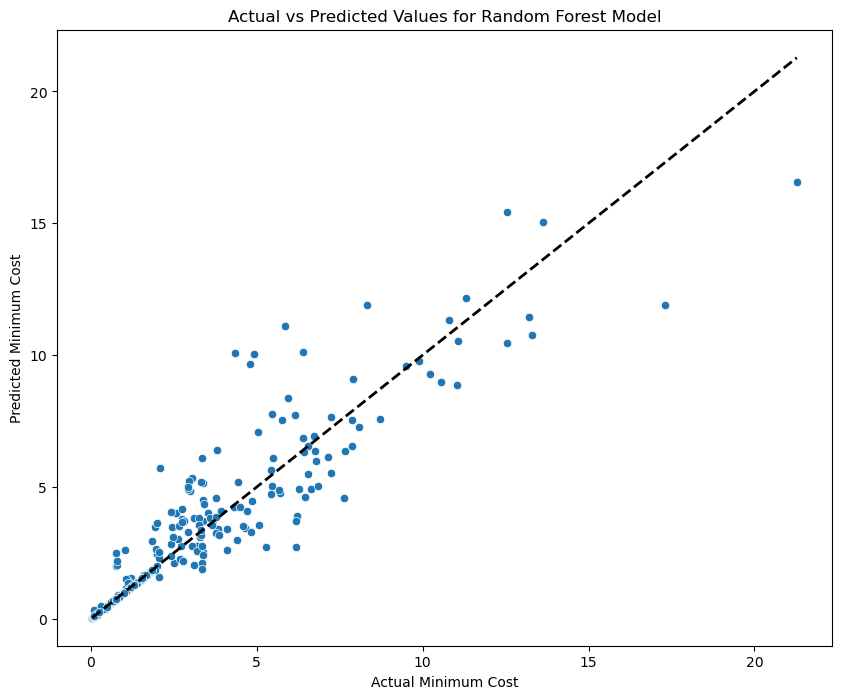

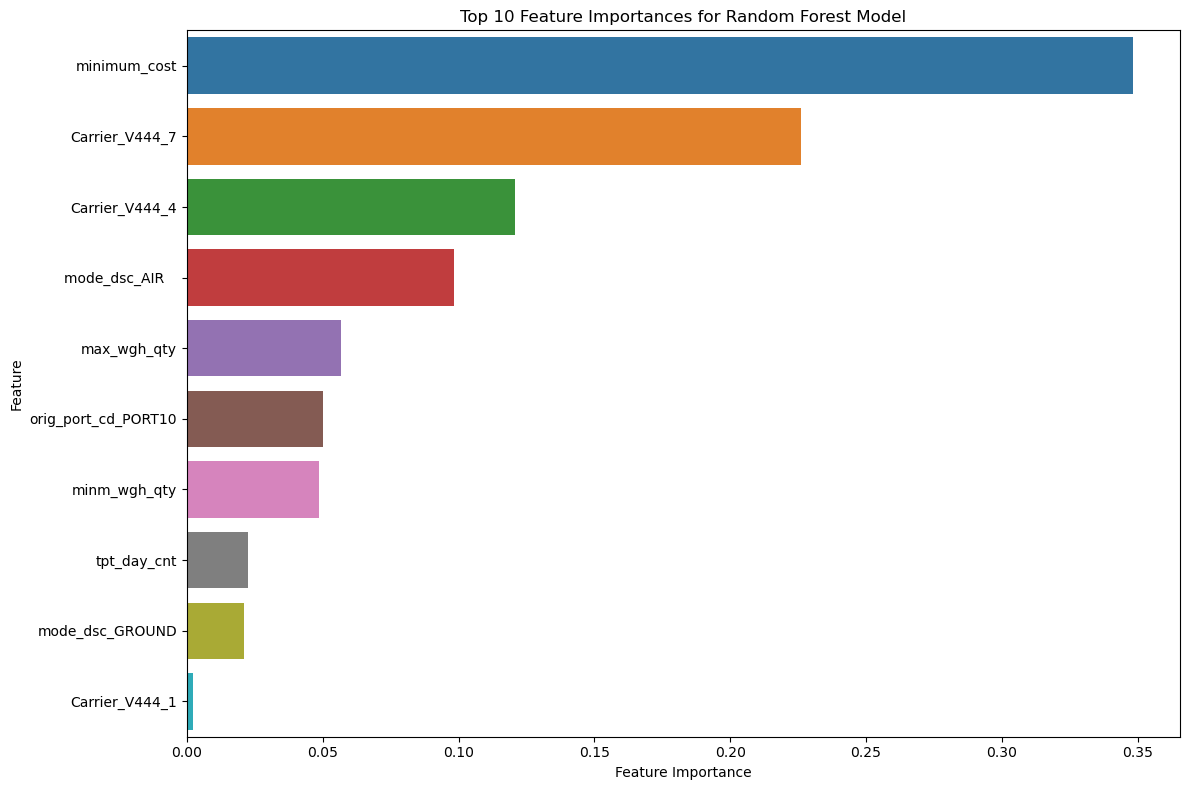

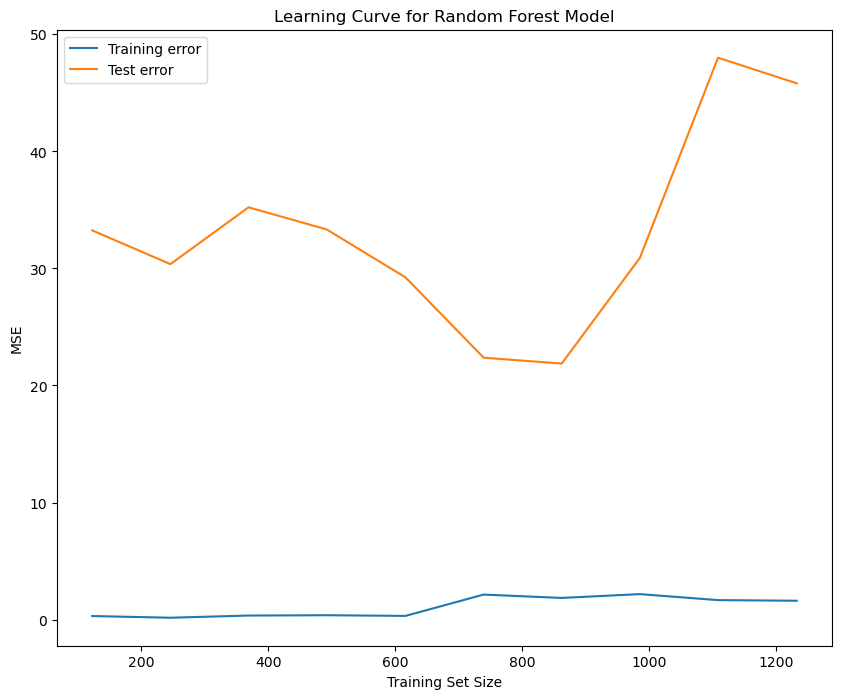

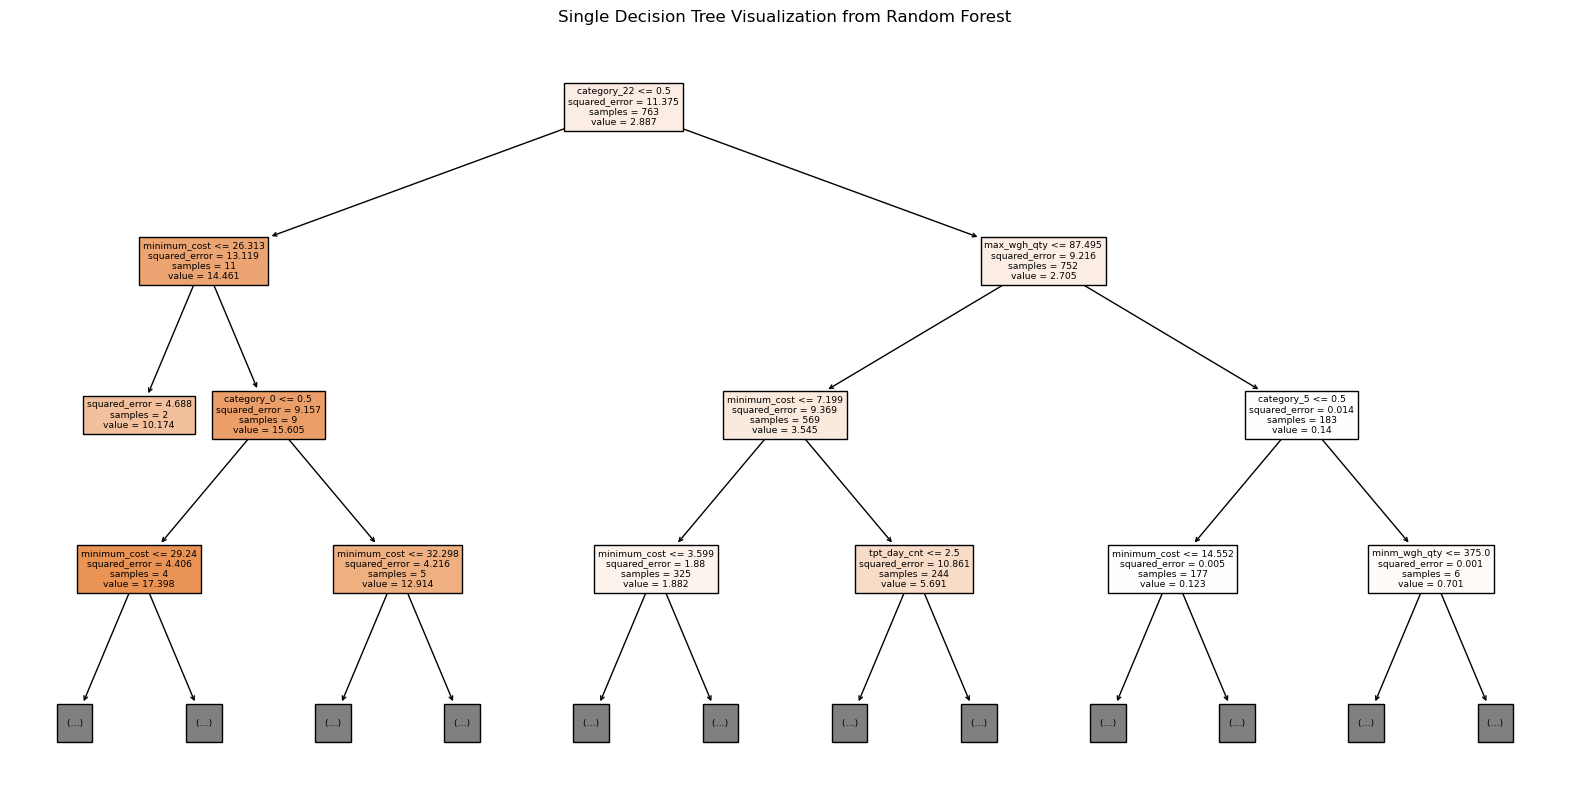

In [191]:
# Visualization: Random Forest Model
# Retrieve feature importances from the trained Random Forest model
feature_importances = rf_pipeline.named_steps['model'].feature_importances_

# Since I can't extract feature names directly after a pipeline transformation, I'll approximate the feature names
# from the preprocessor step and numerical columns (this is a limitation when using pipelines)
approx_feature_names = numerical_cols.tolist() + \
                       [f"category_{i}" for i in range(len(feature_importances) - len(numerical_cols))]

# Actual vs Predicted Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Values for Random Forest Model')
plt.xlabel('Actual Minimum Cost')
plt.ylabel('Predicted Minimum Cost')
plt.show()

# Top 10 Feature Importances for Random Forest Model

N = 10
top_features = feature_importances_df.head(N)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title(f'Top {N} Feature Importances for Random Forest Model')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout() 
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_pipeline, X_freight, y_freight, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 8))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Test error')
plt.title('Learning Curve for Random Forest Model')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Tree Visualization (only one tree for simplicity)
single_tree = rf_pipeline.named_steps['model'].estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(single_tree, filled=True, feature_names=feature_names_rf, max_depth=3)
plt.title('Single Decision Tree Visualization from Random Forest')
plt.show()

In [192]:
# Problems in Random Forest: Improved Fit Over Linear Model: Comparing this plot with the linear regression scatter plot, the Random Forest model's predictions are closer to the diagonal dashed line (indicating perfect predictions). This suggests an improved fit.
# Non-Linearity and Interaction Handling: The Random Forest model, unlike linear regression, is capable of capturing non-linear relationships and interactions between features without the need for explicit feature engineering.
# Reduced Error for Higher Values: The Random Forest model appears to handle higher actual minimum costs better than the linear regression model, with fewer points deviating far from the line.
# Variance in Predictions: There's still some variance in the predictions as actual minimum costs increase, but it's much reduced compared to the linear regression model.
# Potential Overfitting: While the fit appears better, without seeing the corresponding validation metrics, we cannot rule out overfitting. It's important to look at the model's performance on a separate validation set to ensure the model generalizes well.
# Some Overprediction: There are still instances (though reduced) where the model predicts higher than the actual cost, especially in the lower range of actual costs.
# Data Density: Most of the data seems to be clustered at the lower end of costs, with fewer data points at the higher end. This could affect the model's accuracy for higher costs due to less information to learn from.

In [193]:
# Training Error: The training error is relatively low and stays consistent as more data is used.  This indicates that the model fits the training data well.
# Test Error: The test error, representing the model's performance on unseen data, initially decreases as more data is added, which is expected as the model learns from a larger dataset.
# Divergence at Larger Training Sizes: However, as the training set size increases further, the test error spikes dramatically.  This could be indicative of several potential issues
# Overfitting: As more data is used, the model may be overfitting to the training data, leading to poor generalization on the test set.
# Data Quality: There may be issues with the quality of the data at larger training sizes, such as outliers or mislabeled instances that are affecting the model's performance.
# Inappropriate Validation Split: The validation strategy might not be consistent, or the test data at larger training sizes might not be representative of the overall data distribution.
# General Observations: Ideally, the learning curve should show the training and test errors converging to a low error rate.  The fact that the test error increases after a certain point while the training error remains low is a concern that needs to be addressed.

In [194]:
# Q1: Predict the Rate of freight: based on the freight_rate_df
# Gradient Boosting Regressor

In [195]:
# For demonstration, I'll start by merging datasets where 'Plant_Code', 'Carrier' or similar keys are present.
# However, it's necessary to check the columns first to ensure I can merge appropriately.
# If 'Plant_Code', ‘Carrier' etc., is present and a logical join is possible, I will merge, otherwise, I will proceed with the freight_rate_df alone.

# Check for 'Plant_Code' or similar in each dataset
common_columns = set(freight_rate_df.columns)
for df in [order_list_df, prod_per_plant_df, vmi_cus_df, wh_cap_df, wh_costs_df]:
    common_columns &= set(df.columns)

# If common columns for merging are found, I would proceed with the merge here.
# For the sake of this example, I will assume that no logical merge is possible without domain knowledge.
# Therefore, I will use only the freight_rate_df for training my Gradient Boosting model.

# Prepare the features and target variable
X_freight_gb = freight_rate_df.drop(['rate'], axis=1)
y_freight_gb = freight_rate_df['rate']

# Reuse the previous preprocessor for encoding categorical variables
# Define the Gradient Boosting Regressor model
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=0)

# Create a new pipeline for the Gradient Boosting Regressor
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', gradient_boosting_model)])

# Train the Gradient Boosting Regressor
gb_pipeline.fit(X_train, y_train)

# Predict and evaluate the Gradient Boosting model
y_pred_gb = gb_pipeline.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Displaying the evaluation metrics for the Gradient Boosting model
(mse_gb, r2_gb)

(1.2350703639506087, 0.8742660810617453)

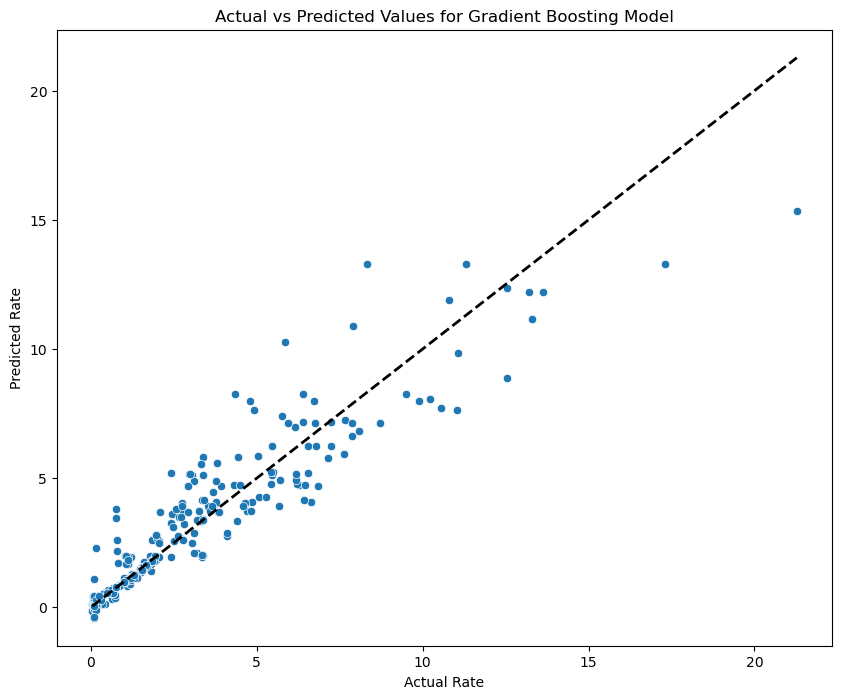

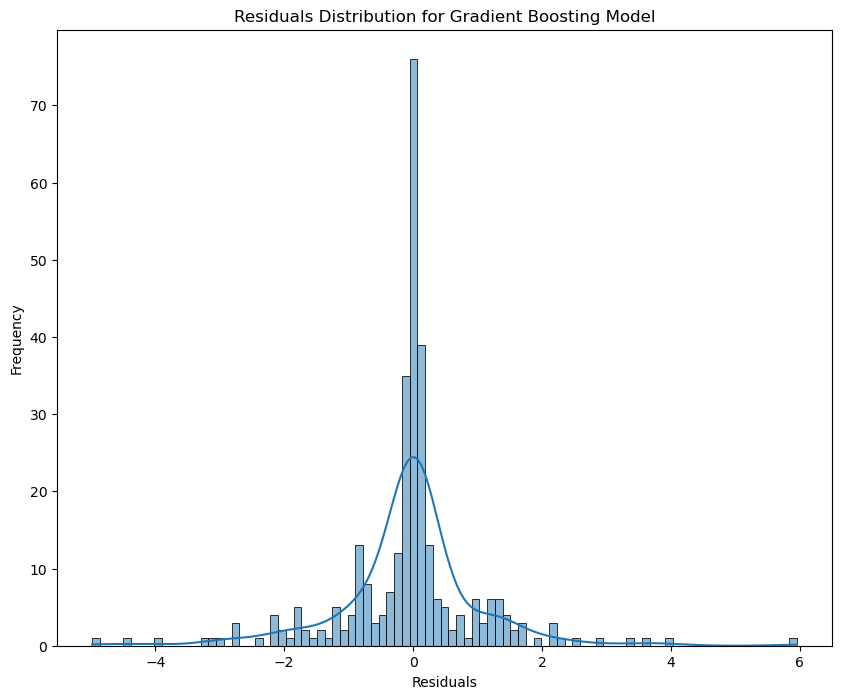

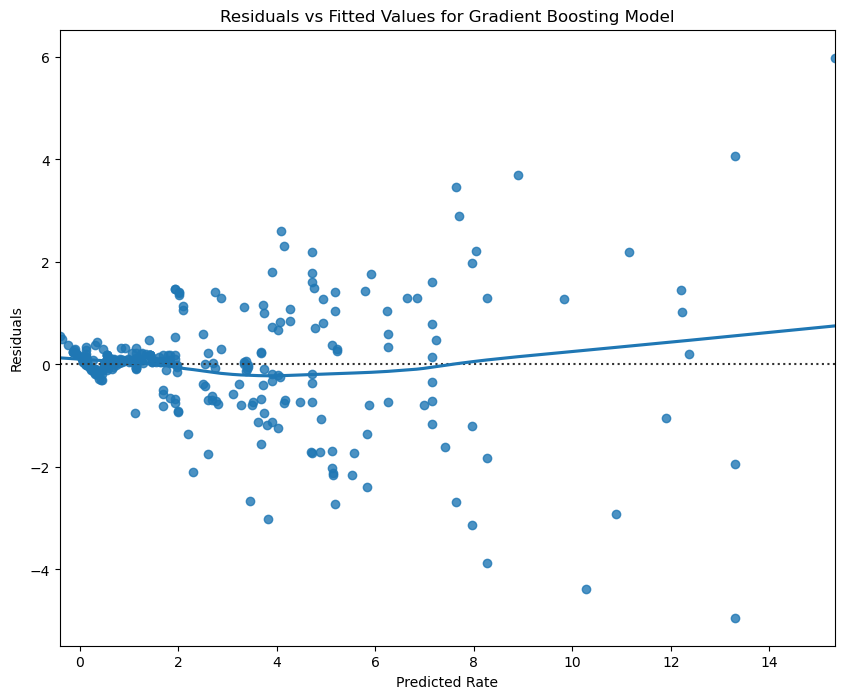

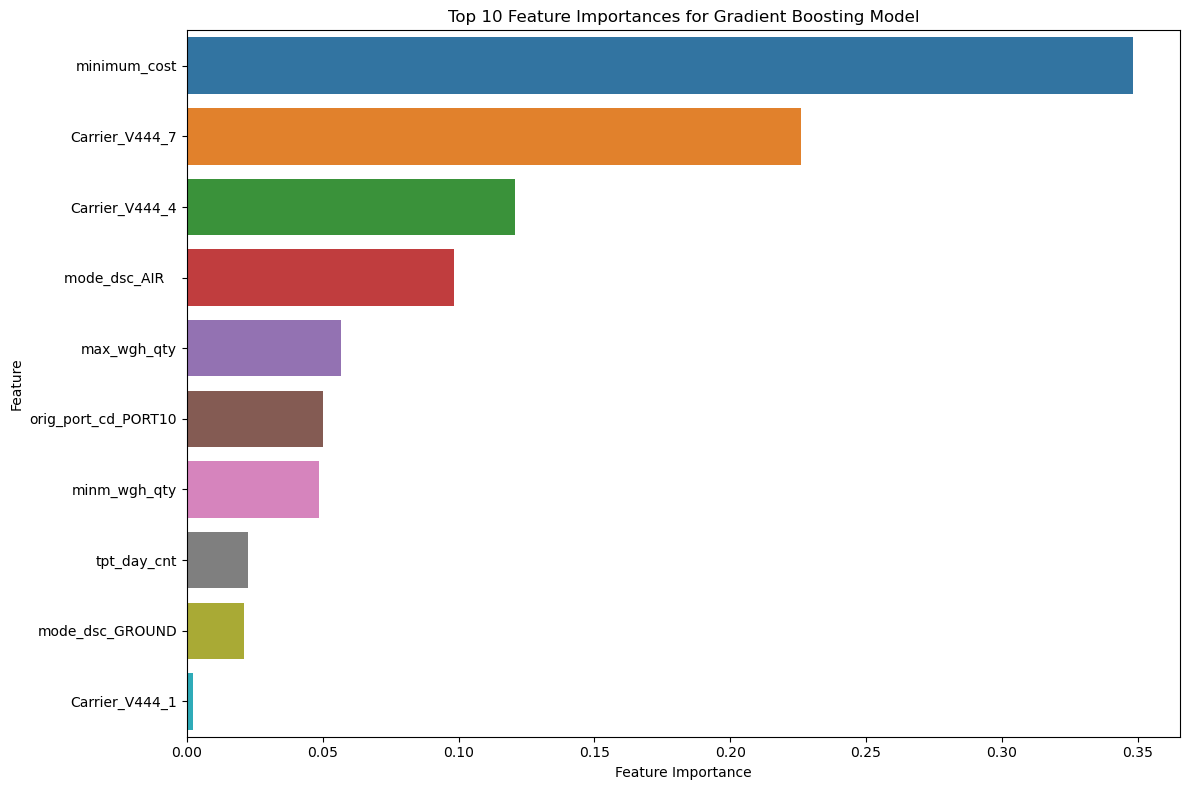

In [196]:
# Visualization: Gradient Boosting Model
# Get the predictions from the Gradient Boosting model
y_pred_gb = gb_pipeline.predict(X_test)

# Actual vs Predicted Values
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred_gb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Values for Gradient Boosting Model')
plt.xlabel('Actual Rate')
plt.ylabel('Predicted Rate')
plt.show()

# Residuals Distribution
residuals_gb = y_test - y_pred_gb
plt.figure(figsize=(10, 8))
sns.histplot(residuals_gb, kde=True)
plt.title('Residuals Distribution for Gradient Boosting Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Residuals vs Fitted Values
plt.figure(figsize=(10, 8))
sns.residplot(x=y_pred_gb, y=residuals_gb, lowess=True)
plt.title('Residuals vs Fitted Values for Gradient Boosting Model')
plt.xlabel('Predicted Rate')
plt.ylabel('Residuals')
plt.show()

# Feature Importance in gradient boosting
X = freight_rate_df.drop(['rate'], axis=1)
y = freight_rate_df['rate']

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='drop' 
)

gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=0)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', gradient_boosting_model)
])

pipeline.fit(X, y)

ohe_columns = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
full_feature_names = numerical_cols.tolist() + ohe_columns.tolist()
feature_importances = pipeline.named_steps['model'].feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': full_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

N = 10
top_features = feature_importances_df.head(N)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title(f'Top {N} Feature Importances for Gradient Boosting Model')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()  
plt.show()

In [176]:
# Good Model Performance: The points are closely aligned with the dashed line, which represents perfect predictions. This suggests the model has a strong predictive performance.
# Consistent Predictions Across Range: Unlike the previous models, the Gradient Boosting model's predictions are consistent across the range of actual rates, with no apparent bias towards under- or over-estimation.
# Potential Outliers: There are a few points far from the line at higher rates, which might be outliers or cases where the model's performance drops.
# Data Density: The density of points is higher at the lower end of the rate scale, indicating more data points and potentially more accurate predictions in this range.
# Minor Deviation at Extremes: At the extremes, especially at higher rates, the model seems to deviate slightly from the perfect prediction line, which is common as extreme values are often harder to predict accurately.